# Importing Libraries

In [691]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import keras

# Loading Data

In [692]:
data = pd.read_csv("musk_csv.csv")

In [693]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


# Preprocessing Data

In [694]:
X = data.drop(["class" , "ID" ],axis =1)

In [695]:
X.shape

(6598, 168)

In [696]:
Y = data["class"]

In [697]:
encoder = preprocessing.LabelEncoder()

In [698]:
for i in X.columns:
    if isinstance(X[i][0],str):
        X[i] = encoder.fit_transform(X[i])

# Train-Test Split 

In [699]:
from sklearn.model_selection import train_test_split


In [723]:
x_train,x_test,y_train,y_test = train_test_split(X.values,Y.values, test_size = 0.2 , random_state = 0)

# Model Building

In [724]:
from keras.models import Sequential
from keras.layers import Dense

In [754]:
model = Sequential()

In [755]:
model.add(Dense(64, input_dim = 168 , activation = 'relu'))

In [756]:
model.add(Dense(64,activation = 'relu'))

In [757]:
model.add(Dense(1 , activation = 'sigmoid'))

In [758]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [760]:
history = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=10  ,batch_size = 128)

Train on 5278 samples, validate on 1320 samples
Epoch 1/10
5278/5278 [==============================] - 0s 58us/step - loss: 0.5039 - accuracy: 0.9672 - val_loss: 0.2700 - val_accuracy: 0.9629
Epoch 2/10
5278/5278 [==============================] - 0s 29us/step - loss: 0.3372 - accuracy: 0.9706 - val_loss: 2.9950 - val_accuracy: 0.9311
Epoch 3/10
5278/5278 [==============================] - 0s 29us/step - loss: 0.3128 - accuracy: 0.9723 - val_loss: 0.1049 - val_accuracy: 0.9856
Epoch 4/10
5278/5278 [==============================] - 0s 31us/step - loss: 0.3353 - accuracy: 0.9750 - val_loss: 0.6484 - val_accuracy: 0.9417
Epoch 5/10
5278/5278 [==============================] - 0s 67us/step - loss: 0.1790 - accuracy: 0.9826 - val_loss: 1.3263 - val_accuracy: 0.8932
Epoch 6/10
5278/5278 [==============================] - 0s 50us/step - loss: 0.1950 - accuracy: 0.9820 - val_loss: 0.3538 - val_accuracy: 0.9697
Epoch 7/10
5278/5278 [==============================] - 0s 29us/step - loss: 0.182

In [750]:
score=model.evaluate(x_test,y_test,verbose=0)

In [751]:
score

[0.1527316359065517, 0.9765151739120483]

In [752]:
from keras.models import load_model 
model.save('project_model.h5')

# Loss and Accuracy Graph

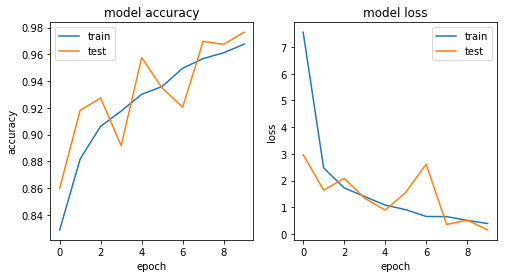

In [749]:
plt.figure(1 , figsize = [8,4])
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig("graph.png")
plt.show()

# Performance Measures

In [658]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [753]:
print("f1_score:",f1_score(y_test,model.predict_classes(x_test)))
print("recall:",recall_score(y_test,model.predict_classes(x_test)))
print("Validation Loss:",score[0])
print("Validation Accuracy:",score[1])

f1_score: 0.9194805194805195
recall: 0.885
Validation Loss: 0.1527316359065517
Validation Accuracy: 0.9765151739120483
